# **Step 1° - Convolution of hyperspectral data**

In [ ]:
import os
import pandas as pd

# Setting the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia")

# Reading the CSV file
DB_raw = pd.read_csv("DB_Worldspecs_raw_Asia_9.csv", encoding='ISO-8859-1')

hyper_data = DB_raw

# Select the ID column number and the numbers where the hyperspectral bands begin and end
hyper_data = hyper_data.iloc[:, [0] + list(range(109, 2260))]

In [ ]:
print(hyper_data)

In [ ]:
##################################################################
#  At this stage of the script, data from hyperspectral bands    #
#  to multispectral bands is convolved.                          #
#  Pay attention to the script comments at this stage            #
##################################################################


# Imports
# Se estiver executando o script na máquina pessoal, insira o diretório da linguagem R instalada na máquina
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.3.2'
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# Saving Dataframes to CSV

os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_1")
hyper_data.to_csv("hyper_data.csv", index=False)

# R Script
r_script = """

# Reading CSV files

# Ajuste do limite de memória no início do script
#memory.limit(size=20000000)

setwd("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_1")
hyper_data <- read.csv("hyper_data.csv", header = TRUE, sep = ",")

rownames(hyper_data) <- hyper_data[, 1]
hyper_data1 <- hyper_data
hyper_data1 <- hyper_data1[, -1]
ID_Unique <- hyper_data[, 1]
colnames(hyper_data1) <- seq(from = 350, to = 2500, by = 1)


##############################################################################################
## R: Directory path to the required hsdar package libraries##                               #
#                                                                                            #
.libPaths("E:/OneDrive/Documentos/Doutorado/protocol_database/libraires")                    #
#                                                                                            #
##############################################################################################

# Load the hsdar package
library(hsdar)


# Create a matrix of the data
hyper_data.matrix <- as.matrix(hyper_data1)

# Wavelengths for hyperspectral data
wave.hyper_data <- seq(from = 350, to = 2500, by = 1)

# Create speclib of the data
hyper_data.speclib <- speclib(hyper_data.matrix, wave.hyper_data)

# Get characteristics of the sensor
get.sensor.characteristics("Sentinel2a", response_function = TRUE)


############################################################################################
#The following command will obtain the channel wavelength of deployed
#satellite sensors (multispectral).
#Below is a list of sensor names available for operation.
#Copy and paste the name into the command:

#"Landsat4"
#"Landsat5"
#"Landsat7"
#"Landsat8"
#"Sentinel2a"
#"Sentinel2b"
#"RapidEye
#"WorldView2-8"
#"Quickbird"
#"WorldView2-4"

# Perform spectral resampling
multi_data.sentinel2.1 <- spectralResampling(hyper_data.speclib, "Sentinel2a",
                                            response_function = TRUE)

############################################################################################

# Plot a graph
plot(multi_data.sentinel2.1[1])

# Summary statistics
summary(multi_data.sentinel2.1)


# Round the values before transforming into a dataframe
resampled_spectra <- as.data.frame(multi_data.sentinel2.1)

#resampled_spectra <- round(as.data.frame(multi_data.sentinel2.1))

# Add IDs back
resampled_spectra <- cbind(ID_Unique, resampled_spectra)

# Write the dataframe to a CSV file
setwd("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_1")
write.csv(resampled_spectra, "resampled_spectra.csv", row.names = FALSE)

"""
# Executing the R script
robjects.r(r_script)

In [ ]:
# Setting the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_1")
# Reading the CSV file

resampled_spectra = pd.read_csv("resampled_spectra.csv")

print(resampled_spectra)

### **Data handling for Landsat 8 spectral resolution**

In [ ]:
# Landsat 8 spectral resolution:

# B1.........Costal...........430-450 (nm)
# B2.........Blue.............450-510 (nm)
# B3.........Green............530-590 (nm)
# B4.........Red..............640-670 (nm)
# B5.........NIR..............850-880 (nm)
# B9.........Cirrus.........1360-1380 (nm)
# B6.........SWIR1..........1570-1650 (nm)
# B7.........SWIR2..........2110-2290 (nm)


# Create a dictionary of correspondence between original and new names
corresponding_name = {
    "ID_Unique": "ID_Unique",
    "Costal": "Costal_Landsat8_resampled",
    "Blue": "Blue_Landsat8_resampled",
    "Green": "Green_Landsat8_resampled",
    "Red": "Red_Landsat8_resampled",
    "NIR": "NIR_Landsat8_resampled",
    "Cirrus": "Cirrus_Landsat8_resampled",
    "SWIR1": "SWIR1_Landsat8_resampled",
    "SWIR2": "SWIR2_Landsat8_resampled"
}

# Rename the columns of the resampled_spectra dataframe
resampled_spectra.columns = [corresponding_name[col] for col in resampled_spectra.columns]

# Merge the dataframes
DB_raw_resampled_spectra = pd.merge(DB_raw, resampled_spectra, on="ID_Unique")

In [ ]:
print(DB_raw_resampled_spectra)

In [ ]:
# Saving Dataframes to CSV
DB_raw_resampled_spectra.to_csv("DB_raw_resampled_spectra.csv", index=False)

### **Data handling for Sentinel-2A spectral resolution**

In [ ]:
# Sentinel-2A spectral resolution:
# B1.........Aerossol.........430-450 (nm)
# B2.........Blue.............458-523 (nm)
# B3.........Green............543-578 (nm)
# B4.........Red..............650-680 (nm)
# B5.........Red Edge 1.......698-713 (nm)
# B6.........Red Edge 2.......733-748 (nm)
# B7.........Red Edge 3.......773-793 (nm)
# B8.........NIR..............785-899 (nm)
# B8A........Red Edge 4.......855-875 (nm)
# B9.........Water Vapor......930-950 (nm)
# B10........Cirrus...........1360-1390 (nm)
# B11........SWIR 1...........1565-1655 (nm)
# B12........SWIR 2...........2100-2280 (nm)

# Create a dictionary of correspondence between original and new names
corresponding_name = {
    "ID_Unique": "ID_Unique",
    "SR_AV_B1": "Aerosol_Sentinel2A_resampled",
    "SR_AV_B2": "Blue_Sentinel2A_resampled",
    "SR_AV_B3": "Green_Sentinel2A_resampled",
    "SR_AV_B4": "Red_Sentinel2A_resampled",
    "SR_AV_B5": "Red_Edge_1_Sentinel2A_resampled",
    "SR_AV_B6": "Red_Edge_2_Sentinel2A_resampled",
    "SR_AV_B7": "Red_Edge_3_Sentinel2A_resampled",
    "SR_AV_B8": "NIR_Sentinel2A_resampled",
    "SR_AV_B8A": "Red_Edge_4_Sentinel2A_resampled",
    "SR_AV_B9": "Water_Vapor_Sentinel2A_resampled",
    "SR_AV_B10": "Cirrus_Sentinel2A_resampled",
    "SR_AV_B11": "SWIR_1_Sentinel2A_resampled",
    "SR_AV_B12": "SWIR_2_Sentinel2A_resampled"
}

# Rename the columns of the resampled_spectra dataframe
resampled_spectra.columns = [corresponding_name[col] for col in resampled_spectra.columns]

# Merge the dataframes
DB_raw_resampled_spectra = pd.merge(DB_raw, resampled_spectra, on="ID_Unique")

In [ ]:
print(DB_raw_resampled_spectra)

In [ ]:
# Saving Dataframes to CSV
DB_raw_resampled_spectra.to_csv("DB_Worldspecs_raw_Asia_resampled_spectra_10.csv", index=False)

# **Step 2° - Filter by equations**

## **Step 2.1 - Filter equation lignin**


At this stage of the filtering process, the goal is to capture the mathematical relationship within the hyperspectral signature of the soil, specifically in the range of 2100 nm to 2200 nm, where a peak absorption of the 1:1 clay mineral Kaolinite is observed. To achieve this outcome, the reflectance value of the 2200 nm band is subtracted from that of the 2100 nm band, resulting in a negative numerical value.

Within the setting of a soil analysis laboratory, it is possible for a soil sample to contain an excess of vegetal origin material. When collecting data from the hyperspectral signature of this sample, the Kaolinite range, where the absorption peak should occur, reflects electromagnetic energy due to the spectral characteristics of "**lignin**" present in the vegetal material of the respective soil sample. Consequently, the mathematical relationship will yield a positive numerical value.

The image below illustrates these relationships:

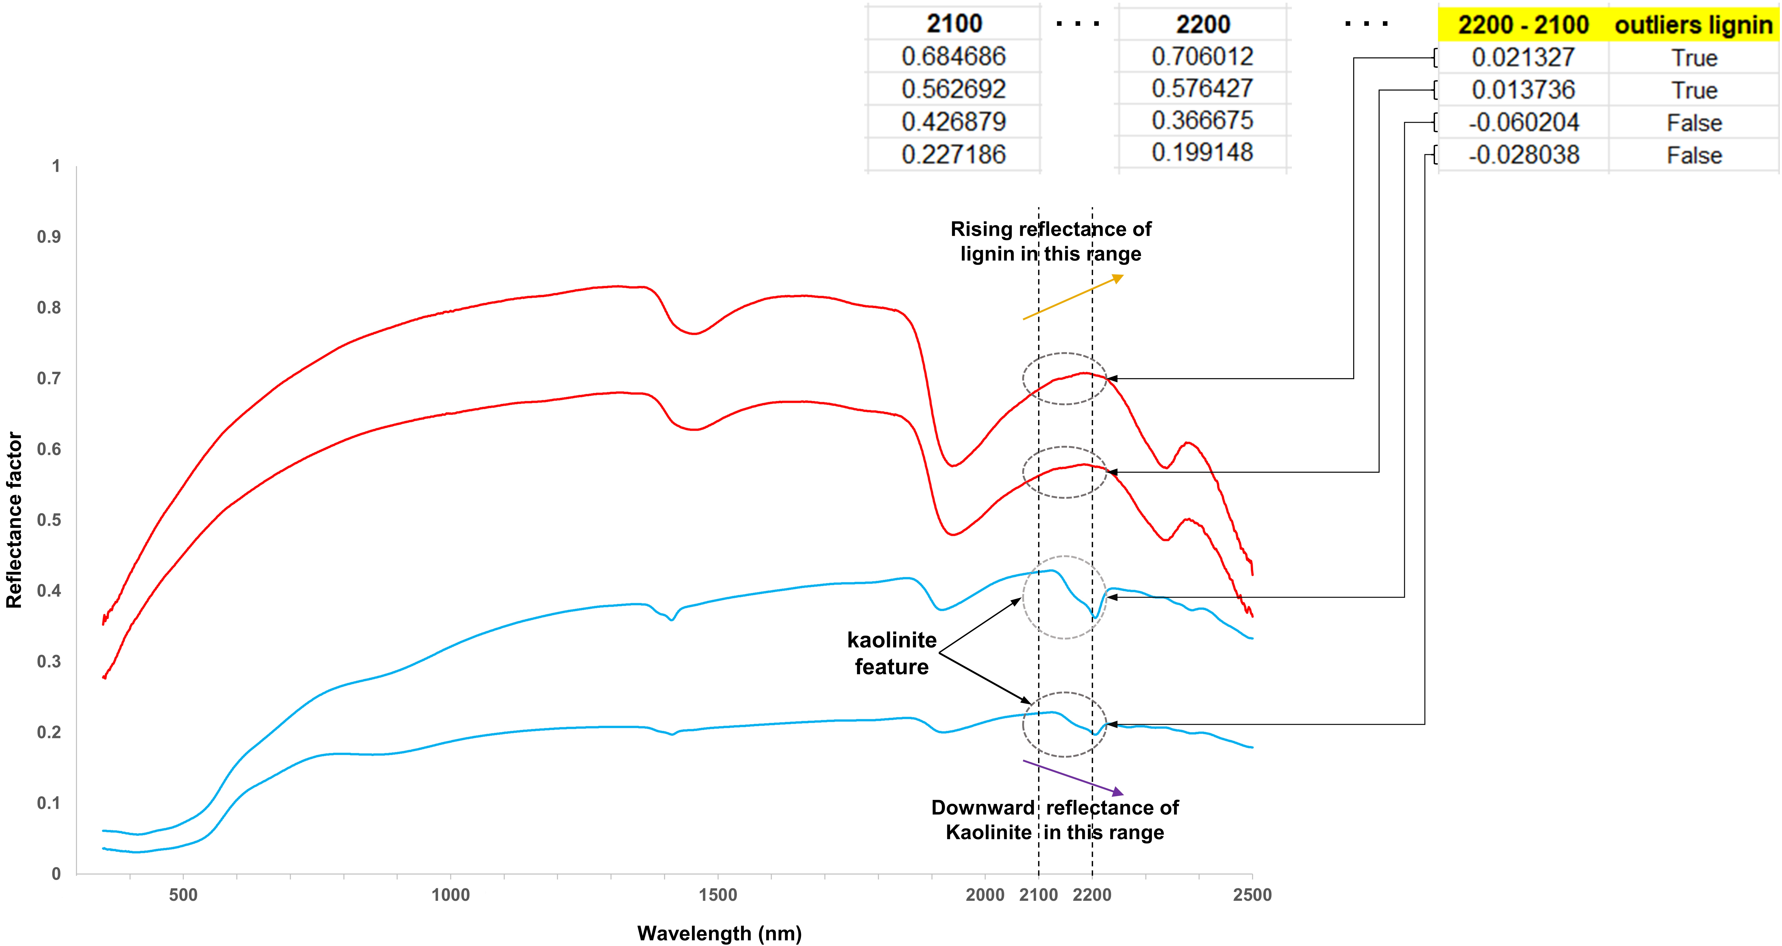

In [ ]:
import os
import pandas as pd

# Setting the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_1")

# Reading the CSV file
DB_raw_resampled_spectra = pd.read_csv("DB_Worldspecs_raw_Asia_resampled_spectra_10.csv", sep=',')

# Exibindo o DataFrame incial
print(DB_raw_resampled_spectra)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Assuming DB_raw_resampled_spectra is the original DataFrame
# First, select the relevant columns (ID_Unique and the columns from 2100 to 2200)
selected_columns = ['ID_Unique'] + [str(i) for i in range(2100, 2201)]

# Filter the DataFrame to include only the relevant columns
df_selected = DB_raw_resampled_spectra[selected_columns]

# Prepare the x values (the fixed axis from 2100 to 2200)
x = np.arange(2100, 2201)

# Lists to store the slope and intercept for each sample
slopes = []
intercepts = []

# Perform the linear regression for each sample
for _, row in df_selected.iterrows():
    y = row[1:].values.astype(np.float64)  # The y values are the cells of each sample from 2100 to 2200, ensuring they are float64

    # Perform the linear regression
    slope, intercept, _, _, _ = linregress(x, y)

    # Store the results
    slopes.append(slope)
    intercepts.append(intercept)

# Create a new DataFrame with the coefficients, keeping 'Slope' as the column name
df_coefficients = pd.DataFrame({
    'ID_Unique': df_selected['ID_Unique'],
    'Slope': slopes,  # Keep 'Slope' as the column name
    'Intercept': intercepts
})

# Display the DataFrame with the coefficients
print(df_coefficients)


# Assuming df_coefficients is the DataFrame with the slopes and intercepts

#####################################################################################################################

# A positive angular coefficient indicates the presence of lignin. A critical
# threshold of 0.00055 is set for the angular coefficient to flag outliers,
# but this value can be adjusted based on the dataset. Analyze the spectral
# behavior of your set, as shown in the figure of this chunk.

ids_dict = {row['ID_Unique']: row['Slope'] for _, row in df_coefficients.iterrows() if row['Slope'] > 0.000055}

#####################################################################################################################

# Display the dictionary
print(ids_dict)

In [ ]:
DB_raw_resampled_spectra1 = DB_raw_resampled_spectra.copy()

# Add a new column 'outliers_lignin' and initialize all cells with the value False
DB_raw_resampled_spectra1.insert(1, 'outliers_lignin', False)

# Update 'outliers_lignin' to True for IDs present in ids_dict
DB_raw_resampled_spectra1.loc[DB_raw_resampled_spectra1['ID_Unique'].isin(ids_dict.keys()), 'outliers_lignin'] = True

# DataFrame for True values in outliers_lignin
outliers_samples_lignin = DB_raw_resampled_spectra1[DB_raw_resampled_spectra1['outliers_lignin'] == True]

# DataFrame for False values in outliers_lignin
DB_filter_lignin = DB_raw_resampled_spectra1[DB_raw_resampled_spectra1['outliers_lignin'] == False]

# Display the updated DataFrame
print(DB_raw_resampled_spectra1)

In [ ]:
# Displaying the final DataFrame of the spectral signature lignin filtering stage

print(DB_filter_lignin)

In [ ]:
# Checking the number of samples in the initial dataframe,
# outliers lignin dataframe, and filtered dataframe

# Print the number of samples in DB_raw_resampled_spectra
print("Number of samples in DB_raw_resampled_spectra:", DB_raw_resampled_spectra.shape[0])

# Print the number of samples in outliers_samples_lignin
print("Number of samples in outliers_samples_lignin:", outliers_samples_lignin.shape[0])

# Print the number of samples in DB_filter_lignin
print("Number of samples in DB_filter_lignin:", DB_filter_lignin.shape[0])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot outliers
def plot_spectra(data, plot_name: str = 'spectra_plot'):
    # Filtering columns that can be converted to integers

    wavelength_min = "420"  # Adjust the minimum wavelength
    wavelength_max = "2500"  # Adjust the maximum wavelength
    # Select columns within the specified wavelength range and convert to a list
    spectral_columns = outliers_samples_lignin.loc[:, wavelength_min:wavelength_max].columns.tolist()  # Soil spectra (original)

    # Converting the list of column names to a list of numeric values
    spectral_values = list(map(int, spectral_columns))

    plt.figure(figsize=(11, 6))
    for index, row in data.iterrows():
        # Use the list of column names to index the Series
        plt.plot(spectral_values, row[spectral_columns], label=f'Outlier {index}')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance')
    plt.title(f'Spectral Signatures of {plot_name}')

    # Rotacionar os labels do eixo x para evitar sobreposição
    plt.xticks(rotation=45)

    # Set x-axis labels to 500, 1000, 1500, 2000, and 2500
    plt.xticks([500, 1000, 1500, 2100, 2200, 2500])

    # Setting the y-axis limits directly in the function
    plt.ylim(0, 0.7)  # Setting limits between 0 and 0.6

    plt.grid(False)

    # Setting the directory and filename to save the plot
    output_path = "E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_2/outliers_samples_lignin_Asia.png"
    dpi_value = 1000
    plt.savefig(output_path, dpi=dpi_value)

    plt.show()

In [ ]:
plot_spectra(outliers_samples_lignin, 'outliers samples lignin Asia Database')

## **Step 2.2 - Filter equation tendency**

The tendency equation is a rule that expresses the spectral signature of the soil. The spectral bands Blue, Green, Red, and NIR must necessarily follow the order of increasing values. This order is: Blue < Green < Red < NIR.

In [ ]:
import pandas as pd

# Creating the new DataFrame
results_equation_tendency = pd.DataFrame()

# Adding the 'ID_Unique' column to the new DataFrame
results_equation_tendency['ID_Unique'] = DB_filter_lignin['ID_Unique']

############################################################################
# Change the names of the spectral bands, Blue, Green, Red, and NIR, if
# the names of these respective bands in the columns of your dataset
# are different.

# Adding the 'outlier_tendency' column based on the condition
condition = (
    (DB_filter_lignin['Blue_Sentinel2A_resampled'] < DB_filter_lignin['Green_Sentinel2A_resampled']) &
    (DB_filter_lignin['Green_Sentinel2A_resampled'] < DB_filter_lignin['Red_Sentinel2A_resampled']) &
    (DB_filter_lignin['Red_Sentinel2A_resampled'] < DB_filter_lignin['NIR_Sentinel2A_resampled'])
)
############################################################################

results_equation_tendency['outlier_tendency'] = ~condition

# Displaying the new DataFrame
#print(results_equation_tendency)

# Adding the 'outlier_tendency' column to the original DataFrame using merge
DB_filter_lignin1 = pd.merge(DB_filter_lignin, results_equation_tendency[['ID_Unique', 'outlier_tendency']], on='ID_Unique')

# Storing the 'outlier_tendency' column in a temporary variable
outlier_tendency_col = DB_filter_lignin1['outlier_tendency']

# Removing the 'outlier_tendency' column from the DataFrame
DB_filter_lignin1 = DB_filter_lignin1.drop('outlier_tendency', axis=1)

# Inserting the 'outlier_tendency' column at the desired position (position 2)
DB_filter_lignin1.insert(2, 'outlier_tendency', outlier_tendency_col)

# DataFrame for True values in 'outlier_tendency'
outliers_samples_tendency = DB_filter_lignin1[DB_filter_lignin1['outlier_tendency'] == True]

# DataFrame for False values in 'outlier_tendency'
DB_filter_lignin_tendency = DB_filter_lignin1[DB_filter_lignin1['outlier_tendency'] == False]

# Displaying the final DataFrame
print(DB_filter_lignin_tendency)

In [ ]:
# Checking the number of samples in the initial dataframe,
# outliers tendency dataframe, and filtered dataframe

# Print the number of samples in DB_filter_lignin
print("Number of samples in DB_filter_lignin:", DB_filter_lignin.shape[0])

# Print the number of samples in outliers_samples_tendency
print("Number of samples in outliers_samples_tendency:", outliers_samples_tendency.shape[0])

# Print the number of samples in DB_filter_lignin_tendency
print("Number of samples in DB_filter_lignin_tendency:", DB_filter_lignin_tendency.shape[0])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot outliers
def plot_spectra(data, plot_name: str = 'spectra_plot'):
    # Filtering columns that can be converted to integers

    wavelength_min = "420"  # Adjust the minimum wavelength
    wavelength_max = "2500"  # Adjust the maximum wavelength
    # Select columns within the specified wavelength range and convert to a list
    spectral_columns = outliers_samples_tendency.loc[:, wavelength_min:wavelength_max].columns.tolist()  # Soil spectra (original)

    # Converting the list of column names to a list of numeric values
    spectral_values = list(map(int, spectral_columns))

    plt.figure(figsize=(11, 6))
    for index, row in data.iterrows():
        # Use the list of column names to index the Series
        plt.plot(spectral_values, row[spectral_columns], label=f'Outlier {index}')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance')
    plt.title(f'Spectral Signatures of {plot_name}')

    # Set x-axis labels to 500, 1000, 1500, 2000, and 2500
    plt.xticks([500, 1000, 1500, 2000, 2500])

    # Setting the y-axis limits directly in the function
    plt.ylim(0, 0.6)  # Setting limits between 0 and 0.6

    plt.grid(False)

    # Setting the directory and filename to save the plot
    output_path = "E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_2/outliers_samples_tendency_Asia.png"
    dpi_value = 1000
    plt.savefig(output_path, dpi=dpi_value)

    plt.show()

In [ ]:
plot_spectra(outliers_samples_tendency, 'outliers samples tendency Asia Database')

In [ ]:
# Save the DB_filter_step_2 DataFrame as a CSV file
# Setting the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_2")

DB_filter_lignin_tendency.to_csv("DB_filter_step_2_Asia_11.csv", index=False)

outliers_samples_lignin.to_csv("outliers_samples_lignin_Asia.csv", index=False)
outliers_samples_tendency.to_csv("outliers_samples_tendency_Asia.csv", index=False)

# **Step 3° - Filter by PCA and distance Mahalanobis**

In [ ]:
# Packages required
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os

In [ ]:
# Setting the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_2")

# Importing soil spectra
DB_filter_step_2 = pd.read_csv("DB_filter_step_2_Asia_11.csv", low_memory=False)
DB_filter_step_2 = DB_filter_step_2.set_index('ID_Unique') #Assigning row names from ID column

print(DB_filter_step_2)

In [ ]:
### spectra selection ###

# Selecting specific columns where the spectrum begins and ends

# Specify the range of spectral columns
wavelength_min = "420" # adjust the min spectral wavelength
wavelength_max = "2500" # adjust the max spectral wavelength

# Select the spectral columns
data = DB_filter_step_2.loc[:, wavelength_min:wavelength_max] # soil spectra (original)

print(data)

In [ ]:
### standardized data ###

data_selected = data.apply(pd.to_numeric, errors='coerce')
data_selected.fillna(data_selected.min(), inplace=True)

# Standardize the data
scaler = MinMaxScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data), index=data.index)

# Convert the standardized data back to a DataFrame
data_standardized_df = pd.DataFrame(data_standardized)

In [ ]:
print(data_standardized)

In [ ]:
#IDENTIY OUTLIERS FUNCTION
def identify_outliers(x, n_pc_comp=0):
    # Standardize the data
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    # Handle NaN values (replace with mean of each column)
    x_scaled = np.nan_to_num(x_scaled, nan=np.nanmean(x_scaled, axis=0))

    # Perform PCA
    pca = PCA()
    pr_scores = pca.fit_transform(x_scaled)
    explained_variance = pca.explained_variance_ratio_
    cpr = np.cumsum(explained_variance)

    # Determine number of principal components
    if n_pc_comp == 0:
        n_pc_comp = np.min(np.where(cpr > 0.999)[0] + 1)
    elif 0 < n_pc_comp < 1:
        n_pc_comp = np.min(np.where(cpr > n_pc_comp)[0] + 1)

    # Calculate mean and covariance
    mean_pcaA = np.mean(pr_scores[:, :n_pc_comp], axis=0)
    cov_pcaA = np.cov(pr_scores[:, :n_pc_comp], rowvar=False)

    # Calculate Mahalanobis distance
    chiMat = np.zeros((pr_scores.shape[0], 3))
    chiMat[:, 0] = np.array([np.dot(np.dot((pr_scores[i, :n_pc_comp] - mean_pcaA), np.linalg.inv(cov_pcaA)), (pr_scores[i, :n_pc_comp] - mean_pcaA).T) for i in range(pr_scores.shape[0])])

    # Fit Chi-Squared distribution
    chiMat[:, 1] = chi2.cdf(chiMat[:, 0], df=n_pc_comp)

    # Determine critical value
    if n_pc_comp <= 10:
        pcrit = 1 - ((0.24 - 0.003 * n_pc_comp) / np.sqrt(pr_scores.shape[0]))
    else:
        pcrit = 1 - ((0.25 - 0.0018 * n_pc_comp) / np.sqrt(pr_scores.shape[0]))
    pcrit = 0.999
    #pcrit = 0.995

    # Identify outliers
    chiMat[:, 2] = np.where(chiMat[:, 1] >= pcrit, 0, 1)

    # Return the unique IDs of the outliers
    outliers_indices = np.where(chiMat[:, 2] == 0)[0]
    outliers_ids = x.index[outliers_indices]

    return outliers_ids


In [ ]:
# Calling the function and passing the original DataFrame
outliers_ids = identify_outliers(data, n_pc_comp=0.995)

# Exibir os IDs únicos dos outliers
print(outliers_ids)

In [ ]:
filtered_data_step_3 = data.drop(index=outliers_ids)
outliers_data_step_3 = data.loc[outliers_ids]

print(outliers_data_step_3)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot outliers
def plot_spectra(data,plot_name:str = 'spectra_plot', dpi=1000):
    spectral_columns = data.columns  # Assuming spectral columns start from the 25th column


    plt.figure(figsize=(10, 6))
    for index, row in data.iterrows():
        plt.plot(spectral_columns, row[spectral_columns], label=f'Outlier {index}')

    plt.xlabel('Wavelength')
    plt.ylabel('Reflectance')
    plt.title(f'Spectral Signatures of {plot_name} ')
    plt.xticks(spectral_columns[::150])
    plt.grid(False)
    plt.savefig(f'{plot_name}.png', dpi=dpi)
    plt.show()


def plot_3d_pca_with_outliers(data_standardized, outliers_ids, save_path=None):
    """
    Plots a 3D PCA plot highlighting outliers.

    Parameters:
    - data_standardized: The standardized data (samples x features).
    - outliers_ids: Indices of the outliers in the dataset.
    - save_path: (Optional) Path to save the plot. If None, the plot is not saved.
    """
    # Handle NaN values before applying PCA
    data_standardized = data_standardized.fillna(data_standardized.mean()) # Fill NaN with column means

    # Perform PCA
    pca = PCA(n_components=3)
    #pr_scores = pca.fit_transform(data_standardized)
    pr_scores = pd.DataFrame(pca.fit_transform(data_standardized), index=data_standardized.index)

    # Extracting the outliers and non-outliers

    outliers = pr_scores.loc[outliers_ids]
    non_outliers = pr_scores.drop(index=outliers_ids)

    # Convert outliers and non_outliers to numpy arrays for plotting
    outliers_array = outliers.to_numpy()
    non_outliers_array = non_outliers.to_numpy()

    # Create 3D plot
    fig = plt.figure(figsize=(15, 13))
    ax = fig.add_subplot(111, projection='3d')

    # Plot outliers
    ax.scatter(outliers_array[:, 0], outliers_array[:, 1], outliers_array[:, 2], c='red', marker='x', s=75, label="Outliers")

    # Plot non-outliers
    ax.scatter(non_outliers_array[:, 0], non_outliers_array[:, 1], non_outliers_array[:, 2], c='gray', marker='o', alpha=0.6,
                                                                              edgecolors='black', linewidths=0.45, s=30, label="Non-outliers")

    # Label axes with explained variance ratios
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0] * 100:.2f}%)', fontweight='bold', fontsize=28, labelpad=20)
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1] * 100:.2f}%)', fontweight='bold', fontsize=28, labelpad=28)
    ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2] * 100:.2f}%)', fontweight='bold', fontsize=28, labelpad=22)

    # Increase the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=26, pad=2.8)  # Adjusts x and y axis
    ax.tick_params(axis='z', which='major', labelsize=26, pad=7.5)     # Adjusts z axis

    # Add legend
    ax.legend()

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Set the plot title
    plt.title('3D PCA plot with Outliers Asia', fontweight='bold', fontsize=20, y=1.05)

    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=1200)

    # Show plot
    plt.show()


In [ ]:
# Plots Visualization

# Setting the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_3")

plot_spectra(filtered_data_step_3, 'filtered data step 3 Asia')
plot_spectra(outliers_data_step_3, 'Outliers Asia')
plot_spectra(data, 'all data Asia')
plot_3d_pca_with_outliers(data, outliers_ids, save_path='3d_pca_outliers')

In [ ]:
print(outliers_data_step_3)

In [ ]:
outliers_data_step_3 = outliers_data_step_3.reset_index()

IDs_to_filter = outliers_data_step_3['ID_Unique'].tolist()

DB_filter_step_3 = DB_filter_step_2.reset_index()

# Add a new column "outliers_step_3" filled with False
DB_filter_step_3.insert(1, "outliers_step_3", False)

# Update the values to True where ID_Unique is in the list IDs_to_filter
DB_filter_step_3.loc[DB_filter_step_3['ID_Unique'].isin(IDs_to_filter), 'outliers_step_3'] = True

# Create a new DataFrame with only the rows where outliers_step_3 is True
outliers_samples_step_3 = DB_filter_step_3[DB_filter_step_3['outliers_step_3'] == True].copy()

# Remove the samples where outliers_step_3 is True
DB_filter_step_3 = DB_filter_step_3[DB_filter_step_3['outliers_step_3'] == False].copy()

print(outliers_samples_step_3)

In [ ]:
# Checking the number of samples in the initial dataframe,
# outliers_samples_step_3 dataframe, and filtered dataframe

# Print the number of samples in DB_filter_step_2
print("Number of samples in DB_filter_step_2:", DB_filter_step_2.shape[0])

# Print the number of samples in outliers_step_3
print("Number of samples in outliers_samples_step_3:", outliers_samples_step_3.shape[0])

# Print the number of samples in DB_filter_step_3
print("Number of samples in DB_filter_step_3:", DB_filter_step_3.shape[0])

In [ ]:
# Setting the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_3")

# Save the outliers_samples_3 DataFrame as a CSV file
outliers_samples_step_3.to_csv("outliers_samples_step_3_Asia.csv", index=False)

# Save the DB_filter_3 DataFrame as a CSV file
DB_filter_step_3.to_csv("DB_filter_step_3_Asia_12.csv", index=False)

## **Visual analysis of the outiliers determined by Step 3°**

This sub-step is not mandatory for completing the entire protocol, but we strongly recommend that the spectral signatures of samples identified as outliers be visually analyzed. This analysis allows the pedometrist to understand the nature of the outlier spectrum and why the data might be inconsistent or incorrect. Examples include:

- Miscalibration of the Vis-NIR-SWIR sensor, resulting in noise in the spectral signature.
- Contamination of the soil sample with other materials.
- Improper preparation of the soil sample.
- Collection of the spectral data from a target other than the soil sample.

By understanding the nature of the error, the pedometrist can intervene at the source, preventing similar errors from occurring in the future.
However, it is important to note that the spectral data may be correct. The combination of PCA and Mahalanobis distance may flag an outlier that actually corresponds to a soil with distinct spectral behavior, which is not well-represented in the dataset. Therefore, if you identify a sample whose spectral behavior matches all the correct spectral characteristics of a soil in the "outliers_samples_step_3" dataset, we recommend including this sample's data in the "DB_filter_step_3" dataset.

The following interactive plots of the hyperspectral data from soil samples will be generated for visual analysis.

In [ ]:
# Packages required
import os
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
print(outliers_samples_step_3)

In [ ]:
# Define the indices of the columns you want to select
col_index_min = 109  # Index of the first spectral column
col_index_max = 2189  # Index of the last spectral column

# Select the ID column by name and the spectral columns by indices
selected_columns = [outliers_samples_step_3.columns.get_loc('ID_Unique')] + list(range(col_index_min, col_index_max + 1))

# Create a new DataFrame with the desired columns
DB_graphic = outliers_samples_step_3.iloc[:, selected_columns].copy()

print(DB_graphic)

In [ ]:
# Split the dataframe into smaller dataframes based on rows, in this case 50 rows
dfs = np.array_split(DB_graphic, np.ceil(len(DB_graphic) / 100))

# Create the line chart using Plotly Express for each smaller dataframe
for i, df in enumerate(dfs):
    # Reshape the dataframe
    df_melt = df.melt(id_vars=df.columns[0], value_vars=df.columns[1:])

    fig = px.line(df_melt, x='variable', y='value', color=df.columns[0],
                  title=f'Original Spectra {i+1}', labels={'variable': 'Wavelength (nm)', 'value': 'Reflectance Factor'})

    # Customize the chart layout
    fig.update_layout(
        xaxis_title='Wavelength (nm)',
        yaxis_title='Reflectance Factor',
    )

    # Build the HTML file name based on the chart
    html_file_name = os.path.join('G:/OneDrive/Documentos/Doutorado/protocol_database/protocol_update/Step_3', f'Original_Spectra_Plotly_{i+1}.html')

    # Save the interactive chart to an HTML file
    fig.write_html(html_file_name)

    # Display the interactive chart
    fig.show()

# **Step 4° - Filter by Soil Line**

In [ ]:
# Packages required
import os
import statsmodels.api as sm
import numpy as np
import pandas as pd
from plotnine import *
from plotnine import ggsave
import scipy.stats as stats
from plotnine import ggplot

In [ ]:
### Soil line on convolved spectra ###

# Set the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_3")

# Read the CSV file
DB_filter_step_3 = pd.read_csv("DB_filter_step_3_Asia_12.csv")

# Assigning to a variable for clarity
DB = DB_filter_step_3

print(DB_filter_step_3)

In [ ]:
### Cutting line determination ###

# Specify the X and Y columns
column_x_conv = DB['Red_Sentinel2A_resampled']
column_y_conv = DB['NIR_Sentinel2A_resampled']

# Create a linear regression model
X = sm.add_constant(column_x_conv)  # Add the constant for the intercept term
model = sm.OLS(column_y_conv, X).fit()

# Calculate predicted values
predictions = model.predict(X)

# Calculate the standard deviation of residuals
residuals = model.resid
std_residuals = np.std(residuals)

# Confidence level (e.g., 98%)
confidence_level = 0.99

# Quantile of the t distribution
quantile_t = stats.t.ppf((1 + confidence_level) / 2, df=len(residuals) - 2)

# Calculate upper and lower confidence limits
upper_limit_NIR_resam = predictions + quantile_t * (std_residuals * 1.50)
lower_limit_NIR_resam = predictions - quantile_t * (std_residuals * 1.50)

# Regression coefficients
intercept, coef_x = model.params

# Standard error of coefficients
std_error = model.bse

# T-value and p-value of coefficients
t_value = model.tvalues
p_value = model.pvalues

# Coefficient of determination (R²)
r_squared_convolved = model.rsquared

# Fit a linear regression model for the upper limit
model_upper_limit = sm.OLS(upper_limit_NIR_resam, X).fit()

# Fit a linear regression model for the lower limit
model_lower_limit = sm.OLS(lower_limit_NIR_resam, X).fit()

# Coefficients of intercept and slope for the upper limit
coef_intercept_upper, coef_slope_upper = model_upper_limit.params

# Coefficients of intercept and slope for the lower limit
coef_intercept_lower, coef_slope_lower = model_lower_limit.params

# Display coefficients
print("Coefficients for Upper Limit:")
print("Intercept (β0):", round(coef_intercept_upper, 4))
print("Slope (β1):", round(coef_slope_upper, 4))

print("\nCoefficients for Lower Limit:")
print("Intercept (β0):", round(coef_intercept_lower, 4))
print("Slope (β1):", round(coef_slope_lower, 4))

In [ ]:
### plot the Soil line by convolved data ###

# Desired width and height of the plot
plot_width = 9
plot_height = 6

soil_line_plot = (
    ggplot(DB, aes(x='Red_Sentinel2A_resampled', y='NIR_Sentinel2A_resampled')) +
    theme_classic() +
    geom_point(shape='o', color= 'black', fill= "#E49247", alpha=1, size=1.5, stroke=0.2) + # Data points with black contour +  # Data points
    geom_smooth(method='lm', se=False, color='#000000', size=1.2) +  # Trend line
    geom_line(aes(y=upper_limit_NIR_resam), color='#E41A1C', size=1) +  # Upper confidence interval line
    geom_line(aes(y=lower_limit_NIR_resam), color='#E41A1C', size=1) +  # Lower confidence interval line

    annotate('text', x=0.11, y=0.62, label="β upper limit: {:.3f}".format(round(coef_intercept_upper, 3)),
             family="Arial", size=10)+
    annotate('text', x=0.11, y=0.58, label="β lower limit: {:.3f}".format(round(coef_intercept_lower, 3)),
             family="Arial", size=10)+
    annotate('text', x=0.11, y=0.54, label="R² model: {:.3f}".format(round(r_squared_convolved, 3)),
             family="Arial", size=10)+
    annotate('text', x=0.11, y=0.50, label="α: {:.3f}".format(round(coef_x, 3)),
             family="Arial", size=10)+

    labs(x="Resampled Red (650-680 nm)", y="Resampled NIR (785-899 nm)") +
    expand_limits(x=0, y=0) +  # Force the plot to show the origin (0,0)
    scale_y_continuous(limits=[0, 0.8]) +
    scale_x_continuous(limits=[0, 0.8]) +
    theme(
        axis_title_x=element_text(margin={'t': 10}, family="Arial", size=12, face="bold"),
        axis_title_y=element_text(margin={'r': 10}, family="Arial", size=12, face="bold"),
        axis_text_y=element_text(family="Arial", size=10),
        axis_text_x=element_text(family="Arial", size=10)
    )
)


# Display the plot
print(soil_line_plot)

dpi_value = 1000

# Setting the working directory
output_path = "E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_4/soil_line_plot_Asia.png"
soil_line_plot.save(output_path, width=plot_width, height=plot_height, dpi=dpi_value)

soil_line_plot

In [ ]:
## After Soil Line analysis, filtering the samples in the database ###

# Create a subset of samples that are ABOVE the upper_limit_NIR line
samples_upper_limit = DB[DB['NIR_Sentinel2A_resampled'] > upper_limit_NIR_resam]

# Create a subset of samples that are BELOW the lower_limit_NIR line
samples_lower_limit = DB[DB['NIR_Sentinel2A_resampled'] < lower_limit_NIR_resam]

# Concatenate the dataframes samples_upper_limit and samples_lower_limit
outliers_samples = pd.concat([samples_upper_limit, samples_lower_limit])

# Merge the DataFrames based on the ID_Unique column and keep only the columns from the DB DataFrame
outliers_samples_step_4 = pd.merge(outliers_samples[['ID_Unique']], DB, on='ID_Unique', how='inner')

IDs_to_filter = outliers_samples['ID_Unique'].tolist()

DB_filter_step_4 = DB_filter_step_3

# Add a new column "outliers_step_4" filled with False
DB_filter_step_4.insert(1, "outliers_step_4", False)

# Update the values to True where ID_Unique is in the list IDs_to_filter
DB_filter_step_4.loc[DB_filter_step_4['ID_Unique'].isin(IDs_to_filter), 'outliers_step_4'] = True

# Create a new DataFrame with only the rows where outliers_step_4 is True
outliers_samples_step_4 = DB_filter_step_4[DB_filter_step_4['outliers_step_4'] == True].copy()

# Delete the samples where outliers_step_3 is True
DB_filter_step_4 = DB_filter_step_4[DB_filter_step_4['outliers_step_4'] == False].copy()

print(outliers_samples_step_4)

In [ ]:
# Checking the number of samples in the initial dataframe of the attribute that was analyzed,
# outliers outliers_samples_step_4, and DB_filter_step_4 dataframe

# Print the number of samples in DB_filter_step_3
print("Number of samples in DB_filter_step_3:", DB_filter_step_3.shape[0])

# Print the number of samples in outliers_samples_step_4
print("Number of samples in outliers_samples_step_4:", outliers_samples_step_4.shape[0])

# Print the number of samples in DB_filter_step_4
print("Number of samples in DB_filter_step_4:", DB_filter_step_4.shape[0])

In [ ]:
# Save the DB_filter_step_4 and outliers_samples_step_4 DataFrame as a CSV file
# Setting the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_4")

outliers_samples_step_4.to_csv("outliers_samples_step_4_Asia.csv", index=False)

DB_filter_step_4.to_csv("DB_filter_step_4_Asia_13.csv", index=False)

# **Step 5° - CIFOD Filter**

## URSSA module 1: Importing and pre-processing data

In [ ]:
# Packages required
import os
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise_distances
from scipy.interpolate import interp1d
from plotnine import ggplot

In [ ]:
# Set the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Europe/Step_4")

# Importing data (soil attributes + spectra)
Data_all = pd.read_csv("DB_filter_step_4_Europe_13.csv")
Data_all = Data_all.set_index('ID_Unique') #Assigning row names from ID column

In [ ]:
# Initial Setting up

Data = Data_all

wavelength_min = "420" # adjust the min spectral wavelength
wavelength_max = "2500" # adjust the max spectral wavelength
Spectra_original = Data.loc[:, wavelength_min:wavelength_max] # soil spectra (original)

# Resampling the spectral resolution of soil spectra (it decreases the processing time)
new_resolution = 10  # Define the new spectral resolution (in nanometers)
wavelength_min = int(wavelength_min)
wavelength_max = int(wavelength_max)

# Create the new wavelength array with the correct endpoint
wavelength_resampled = np.arange(wavelength_min, wavelength_max + new_resolution, new_resolution)

def resample_spectrum(x):
    f = interp1d(list(map(int, Spectra_original.columns)), x, kind='cubic')
    return pd.Series(f(wavelength_resampled))

spectra_resampled = Spectra_original.apply(resample_spectrum, axis=1)

# Get the new column names from the 'wavelength_resampled' ndarray.
new_names = list(wavelength_resampled)

# Assign these new names to the columns of the 'spectra_resampled' DataFrame.
spectra_resampled.columns = new_names

# Plotting of the first ten original and resampled spectra
plt.figure()
plt.plot(list(map(int, Spectra_original.columns)), Spectra_original.iloc[:10].T.values)
plt.title('Original Spectra')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance Factor')

plt.figure()
plt.plot(wavelength_resampled, spectra_resampled.iloc[:10].T.values)
plt.title('Resampled Spectra')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance Factor')

# Merge DataFrames using pandas.merge
SpectraResampled = spectra_resampled

# Remove the current index (if any) and assign the column name to 'ID_Unique'
SpectraResampled.reset_index(inplace=True)
SpectraResampled.rename(columns={'index': 'ID_Unique'}, inplace=True)

# Convert the DataFrame to a Pandas DataFrame
SpectraResampled = pd.DataFrame(SpectraResampled)
print(SpectraResampled)

# Selecting the columns of interest
dataset_model = SpectraResampled.loc[:, wavelength_min:wavelength_max]

# Adding the 'ID_Unique' column
dataset_model = pd.concat([SpectraResampled['ID_Unique'], dataset_model], axis=1)

# Setting 'ID_Unique' as the index
SpectraResampled = SpectraResampled.set_index('ID_Unique')
dataset_model = dataset_model.set_index('ID_Unique')

In [ ]:
print(dataset_model)

## URSSA module 2: Unsupervised spectral clustering of samples


The script can be executed in two ways: hosted on a personal machine or through the Google API.

### ***API Google***

In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

utils = importr('utils')
utils.install_packages('randomUniformForest')
utils.install_packages('magrittr')
utils.install_packages('dplyr')
utils.install_packages('tidyverse')

In [ ]:
### MODULE 2: Unsupervised spectral clustering of samples ####

## 1) Unsupervised randomUniformForest classification,
## 2) Calculating spectral proximity from URF,
## 3) Multidimensional Scaling (MDS),
## 4) Clustering samples (K-means)


import rpy2.robjects as robjects
from rpy2.robjects.packages import importr


# Import the R packages
randomUniformForest = importr('randomUniformForest')
magrittr = importr('magrittr')
dplyr = importr('dplyr')
tidyverse = importr('tidyverse')


dataset_model.to_csv("dataset_model.csv", index=True)

# Define the R script
r_script = """

setwd("/content")
dataset_model <- read.csv("dataset_model.csv", header = TRUE, sep = ",", dec = ".", na.strings = "NA", check.names = FALSE)
dataset_model <- dataset_model %>% remove_rownames %>% column_to_rownames(var="ID_Unique")

wavelength_min <- "350"
wavelength_max <- "2500"

results <- unsupervised.randomUniformForest(object = dataset_model %>% select(wavelength_min:wavelength_max), # select spectra
                                              baseModel = "proximity", # c("proximity", "proximityThenDistance", "importanceThenDistance")
                                              endModel = "MDSkMeans", # c("MDSkMeans", "MDShClust", "MDS", "SpectralkMeans")
                                              endModelMetric = NULL,
                                              samplingMethod = "with bootstrap", # c("uniform univariate sampling","uniform multivariate sampling", "with bootstrap")
                                              MDSmetric = "metricMDS", # c("metricMDS", "nonMetricMDS")
                                              proximityMatrix = NULL,
                                              sparseProximities = FALSE,
                                              outliersFilter = FALSE,
                                              Xtest = NULL,
                                              predObject = NULL,
                                              metricDimension = 2,
                                              coordinates = c(1,2),
                                              bootstrapReplicates = 100,
                                              clusters = NULL,
                                              maxIters = NULL,
                                              importanceObject = NULL,
                                              maxInteractions = 2,
                                              reduceClusters = FALSE,
                                              maxClusters = 10,
                                              mapAndReduce = FALSE,
                                              OOB = FALSE,
                                              subset = NULL,
                                              seed = 2014,
                                              uthreads = "auto")

results_final_R <- data.frame("ID_Unique" = rownames(dataset_model),
                              "cluster" = results$unsupervisedModel$cluster,
                              dataset_model)

write.table(results_final_R, "results_final_R.csv", sep = ",", dec = ".",row.names = FALSE)

"""

# Execute the R script
robjects.r(r_script)


### ***Personal machine - local execution environment:***
  Attention, you must indicate the directory path where R is installed. The "randomUniformForest" library requires version 4.3.2. And within the script in R language it is necessary to indicate the path to the directory where the libraries are installed.

In [ ]:
### MODULE 2: Unsupervised spectral clustering of samples ####

## 1) Unsupervised randomUniformForest classification,
## 2) Calculating spectral proximity from URF,
## 3) Multidimensional Scaling (MDS),
## 4) Clustering samples (K-means)

############################################################################################
#  enter the directory of the R language installed on the machine
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.3.2'
############################################################################################

import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# Saving Dataframes to CSV

os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Europe/Step_5")
dataset_model.to_csv("dataset_model.csv", index=True)

# Define the R script
r_script = """

############################################################################################
## R: Directory path to the required hsdar package libraries##                             #
#                                                                                          #
 .libPaths("E:/OneDrive/Documentos/Doutorado/protocol_database/libraires")                 #
#                                                                                          #
############################################################################################

# Load the doParallel library
library(doParallel)

# Configure parallel cluster (can use desired number of cores)
cl <- makeCluster(16)
registerDoParallel(cl)

library(dplyr)
library(tidyverse)
library(randomUniformForest)

############################################################################################

setwd("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Europe/Step_5")

############################################################################################

dataset_model <- read.csv("dataset_model.csv", header = TRUE, sep = ",", dec = ".", na.strings = "NA", check.names = FALSE)
dataset_model <- dataset_model %>% remove_rownames %>% column_to_rownames(var="ID_Unique")

wavelength_min <- "420"
wavelength_max <- "2500"

results <- unsupervised.randomUniformForest(object = dataset_model %>% select(wavelength_min:wavelength_max), # select spectra
                                              baseModel = "proximity", # c("proximity", "proximityThenDistance", "importanceThenDistance")
                                              endModel = "MDSkMeans", # c("MDSkMeans", "MDShClust", "MDS", "SpectralkMeans")
                                              endModelMetric = NULL,
                                              samplingMethod = "with bootstrap", # c("uniform univariate sampling","uniform multivariate sampling", "with bootstrap")
                                              MDSmetric = "metricMDS", # c("metricMDS", "nonMetricMDS")
                                              proximityMatrix = NULL,
                                              sparseProximities = FALSE,
                                              outliersFilter = FALSE,
                                              Xtest = NULL,
                                              predObject = NULL,
                                              metricDimension = 2,
                                              coordinates = c(1,2),
                                              bootstrapReplicates = 100,
                                              clusters = NULL,
                                              maxIters = NULL,
                                              importanceObject = NULL,
                                              maxInteractions = 2,
                                              reduceClusters = FALSE,
                                              maxClusters = 10,
                                              mapAndReduce = FALSE,
                                              OOB = FALSE,
                                              subset = NULL,
                                              seed = 2014,
                                              uthreads = "auto")

results_final_R <- data.frame("ID_Unique" = rownames(dataset_model),
                              "cluster" = results$unsupervisedModel$cluster,
                              dataset_model)

write.table(results_final_R, "results_final_R.csv", sep = ",", dec = ".",row.names = FALSE)

"""

# Execute the R script
robjects.r(r_script)

In [ ]:
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_5")
results_final = pd.read_csv("results_final_R.csv")

print(results_final)

In [ ]:
### manipulating results in dataframes ###

clusters = results_final
clusters.index = clusters['ID_Unique']

# Exclua a coluna 'ID_Unique'
clusters = clusters.drop('ID_Unique', axis=1)


# Merging the cluster code with soil data and the RESAMPLED spectra into a single tabl
Soil_data_spectraResampled_clustered = pd.merge(clusters[['cluster']], SpectraResampled,
                                              left_index=True, right_index=True, how='outer')

# Reset index and rename the index column to 'ID_Unique'
Soil_data_spectraResampled_clustered.reset_index(inplace=True)
Soil_data_spectraResampled_clustered.rename(columns={'index': 'ID_Unique'}, inplace=True)

# Saving the results
Soil_data_spectraResampled_clustered.to_csv("Soil_data_spectraResampled_clustered.csv", sep=",", decimal=".", index=False)

# Merging the cluster code with soil data and the ORIGINAL spectra into a single table
Soil_data_clustered = pd.merge(clusters[['cluster']], Data_all,
                                              left_index=True, right_index=True, how='outer')


# Reset index and rename the index column to 'ID_Unique'
Soil_data_clustered.reset_index(inplace=True)
Soil_data_clustered.rename(columns={'index': 'ID_Unique'}, inplace=True)


# Saving the results to 'clusters.csv' file
Soil_data_clustered.to_csv('Soil_data_clustered.csv', sep=',', decimal='.', index=False)

##Identification of soil attribute outliers by Isolation Forest in each cluster

In [ ]:
# Packages required
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from numpy import where
from mpl_toolkits.mplot3d import Axes3D
from plotnine import *

In [ ]:
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_5")
Soil_data_clustered = pd.read_csv("Soil_data_clustered.csv")

print(Soil_data_clustered)

In [ ]:

# Create an empty DataFrame called results
results = pd.DataFrame()

# Loop through clusters from 1 to 10
for i in range(1, 11):
    # Filter the DataFrame to select only the records where the "cluster" column is equal to i
    data_estratificado = Soil_data_clustered[Soil_data_clustered['cluster'] == i]

    # Find the indices of the columns named "350" and "2500"
    indice_coluna_inicio = data_estratificado.columns.get_loc("420")
    indice_coluna_fim = data_estratificado.columns.get_loc("2500") + 1

    # Select the columns by the range of indices
    colunas_selecionadas = data_estratificado.iloc[:, indice_coluna_inicio:indice_coluna_fim]

    # Calculate the mean and standard deviation of the selected columns
    medias = colunas_selecionadas.mean(numeric_only=True)
    desvio_padrao = colunas_selecionadas.std(numeric_only=True)

    # Create a temporary DataFrame with the results for the current cluster
    results_cluster = pd.DataFrame({
        'cluster': [i] * len(medias),
        'wavelength': medias.index.astype(float),
        'average_reflectance': medias.values,
        'sd': desvio_padrao.values
    })

    # Add the results of the current cluster to the main DataFrame
    results = pd.concat([results, results_cluster], ignore_index=True)


# Delete rows where 'average_reflectance' is NaN (null)
results = results.dropna(subset=['average_reflectance'])

# Create the color palette based on the number of clusters
palette = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3","#FF760A","#FFD700",
           "#0AB2D1", "#F781BF", "#999999", "#66C2A5", "#8C564B","#1F78B4",
           "#B2DF8A", "#FB9A99", "#FDBF6F", "#CAB2D6", "#6A3D9A"]


# Desired width and height of the plot
plot_width = 12
plot_height = 7

spectral_behavior = (ggplot(results, aes(x='wavelength',
                                         y='average_reflectance',
                                         ymin='average_reflectance - sd',
                                         ymax='average_reflectance + sd',
                                         group='cluster')) +

  geom_line(aes(color='factor(cluster)'), size=0.85) +
  geom_ribbon(aes(fill='factor(cluster)'), alpha=0.2) +
  scale_y_continuous(limits=[0, 0.7]) +
  scale_color_manual(values=palette) +  # Manually set the colors
  scale_fill_manual(values=palette) +  # Manually set the fill colors
  labs(title='Spectral behavior of clusters Asia',
       x='Wavelength (nm)',
       y='Reflectance factor',
       color='Cluster',   # Name the color legend
       fill='Cluster') +  # Name the fill legend
  theme_minimal() +
  theme(figure_size=(plot_width, plot_height),
        plot_title=element_text(size=15, face="bold"),
        axis_title_x=element_text(size=12, face="bold"),
        axis_title_y=element_text(size=12, face="bold"),
        legend_text=element_text(size=10),
        legend_title=element_text(size=12, face="bold"),
        plot_background=element_rect(fill="white")))


dpi_value = 1000

# Setting the working directory
output_path = "E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_5/spectral_behavior_of_clusters_Asia.png"
spectral_behavior.save(output_path, width=plot_width, height=plot_height, dpi=dpi_value)

#Show spectral_behavior
spectral_behavior

In [ ]:
# Data preparation
Data = Soil_data_clustered.dropna(subset=['Clay_gkg'])
Data = Data.set_index('ID_Unique')

# Select the cluster column and the variable of interest
Observation = Data[["cluster", "Clay_gkg"]]

# Filter null data in the "Clay_gkg" column
Observation = Observation[Observation['Clay_gkg'].notnull()]

# Specify the range of spectral columns
wavelength_min = "420" # adjust the min spectral wavelength
wavelength_max = "2500" # adjust the max spectral wavelength

# Select the spectral columns
Spectra_original = Data.loc[:, wavelength_min:wavelength_max] # soil spectra (original)

# Merge DataFrames to have all the information in one place
Observation_final = pd.merge(Observation, Spectra_original, left_index=True, right_index=True, how='left')

Observation_final = Observation_final

print(Observation_final)

In [ ]:
############ Isolation Forest ############

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

# Load the dataset
data = Observation_final

# Remove the 'cluster' column to keep only spectral features
features = data.drop(columns=['cluster'])

# Initialize dictionaries to store results

all_anomaly_dict = {}
out_anomalies_dict = {}
plot_data_dict = {}

# Iterate over each unique cluster
for idx, cluster_label in enumerate(sorted(data['cluster'].unique())):

    # Filter data for the current cluster
    cluster_data = data[data['cluster'] == cluster_label]

    # Remove rows with missing values and keep only spectral features
    # Use features.columns to get the column names and select only those columns
    data_filtered = cluster_data[features.columns].dropna()

    # Normalize the data using StandardScaler
    scaler = StandardScaler()
    data_filtered_scaled = scaler.fit_transform(data_filtered)

    # Apply Isolation Forest for anomaly detection
    iforest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
    predictions = iforest.fit_predict(data_filtered_scaled)

    # Get the anomaly score
    anomaly_scores = iforest.decision_function(data_filtered_scaled)
    data_filtered['anomaly_score'] = anomaly_scores

    # Identify indices of outliers (anomalies)
    anom_index = where(predictions == -1)
    anomalies = data_filtered.iloc[anom_index]
    anomalies['cluster'] = cluster_label  # Add the cluster column

    # Store anomalies in the dictionary
    out_anomalies_dict[cluster_label] = anomalies

    # Store anomaly scores for all samples in the dictionary
    data_filtered['cluster'] = cluster_label
    all_anomaly_dict[cluster_label] = data_filtered  # Add scores

    # Apply PCA to reduce spectral features to 2 principal components
    spectral_features = features.columns[1:]  # Exclude 'Clay_gkg'
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_filtered[spectral_features])

    # Create a DataFrame with PCs and the 'Clay_gkg' attribute
    data_3d = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
    data_3d['Clay_gkg'] = data_filtered['Clay_gkg'].values

    # Separate data into outliers and non-outliers
    outliers_3d = data_3d.iloc[anom_index]
    non_outliers_3d = data_3d.drop(index=anom_index[0])

    # Store data for plots in the dictionary
    plot_data_dict[cluster_label] = {
        'data_3d': data_3d,
        'outliers_3d': outliers_3d,
        'non_outliers_3d': non_outliers_3d,
        'pca': pca
    }

In [ ]:
### 3D plot Visualization ###

# Define the color palette for the clusters
palette = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3","#FF760A","#FFD700",
           "#0AB2D1", "#F781BF", "#999999", "#66C2A5"]

# Output directory for the plots
output_dir = "E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_5/Clay"

# Iterate over each cluster and generate plots
for idx, (cluster_label, results) in enumerate(plot_data_dict.items()):
    data_3d = results['data_3d']
    outliers_3d = results['outliers_3d']
    non_outliers_3d = results['non_outliers_3d']
    pca = results['pca']

    # Create 3D plot
    fig = plt.figure(figsize=(18, 16))
    ax = fig.add_subplot(111, projection='3d')

    # Plot outliers
    ax.scatter(outliers_3d['PC1'], outliers_3d['PC2'], outliers_3d['Clay_gkg'],
               c='red', marker='x', s=110, label="Outliers")

    # Plot non-outliers with cluster-specific color
    cluster_color = palette[idx % len(palette)]
    ax.scatter(non_outliers_3d['PC1'], non_outliers_3d['PC2'], non_outliers_3d['Clay_gkg'],
               c=cluster_color, marker='o', alpha=1, edgecolors='black', s=60, label="Non-outliers")


    # Label axes with explained variance of PCs and Clay attribute, and increase font size
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0] * 100:.2f}%)', fontweight='bold', fontsize=35, labelpad=37)
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1] * 100:.2f}%)', fontweight='bold', fontsize=35, labelpad=45)
    ax.set_zlabel('C gkg', fontweight='bold', fontsize=35, labelpad=54)

    # Increase the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=33, pad=9)  # Adjusts x and y axis
    ax.tick_params(axis='z', which='major', labelsize=33, pad=24)     # Adjusts z axis

    # Set z-axis limits from 0 to 900
    ax.set_zlim(0, 900)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Add legend and title
    ax.legend(fontsize=12)
    plt.title(f'3D PCA plot with Outliers for Cluster {cluster_label} Asia\n(Clay gkg vs. PC1 & PC2)', fontweight='bold', fontsize=20, y=1.05)

    # Save the plot as an image with specified DPI
    output_path = f"{output_dir}cluster_{cluster_label}_outlier_detection.png"
    plt.savefig(output_path, dpi=1000)

    # Display the plot
    plt.show()

In [ ]:
# Concatenate all DataFrames in the dictionary into a single DataFrame
anomalies_combined = pd.concat(out_anomalies_dict.values())

# Reset the index of the combined DataFrame
anomalies_combined = anomalies_combined.reset_index()

print(anomalies_combined)

In [ ]:
# Generate a list of all sample IDs in anomalies_combined
IDs_to_filter = anomalies_combined['ID_Unique'].tolist()

# Print the list of sample IDs
print(IDs_to_filter)

# Summary of the number of samples per cluster
summary = anomalies_combined.groupby('cluster').size()

# Print the summary by cluster
print(summary)

In [ ]:
# Concatenate all DataFrames in the dictionary into a single DataFrame
all_anomaly = pd.concat(all_anomaly_dict.values())

# Reset the index of the combined DataFrame
all_anomaly = all_anomaly.reset_index()

# Add a new column "outliers" filled with False
all_anomaly.insert(1, "outliers", False)

# Update the values to True where ID_Unique is in the list IDs_to_filter
all_anomaly.loc[all_anomaly['ID_Unique'].isin(IDs_to_filter), 'outliers'] = True

print(all_anomaly)

# Setting the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_5/Clay")

# Save all_anomaly DataFrame as a CSV file
all_anomaly.to_csv("all_anomaly_score.csv", index=False)

In [ ]:
DB_filter_step_5 = Data.reset_index()

# Add a new column "outliers_step_5_" filled with False
DB_filter_step_5.insert(1, "outliers_step_5_Carbon", False)

# Update the values to True where ID_Unique is in the list IDs_to_filter
DB_filter_step_5.loc[DB_filter_step_5['ID_Unique'].isin(IDs_to_filter), 'outliers_step_5_Carbon'] = True

# Create a new DataFrame with only the rows where outliers_step_5_ is True
outliers_samples_step_5 = DB_filter_step_5[DB_filter_step_5['outliers_step_5_Carbon'] == True].copy()

# Delete the samples where outliers_step_5_ is True
DB_filter_step_5 = DB_filter_step_5[DB_filter_step_5['outliers_step_5_Carbon'] == False].copy()

print(outliers_samples_step_5)

In [ ]:
# Checking the number of samples in the initial dataframe of the attribute that was analyzed,
# outliers outliers_samples_step_5, and DB_filter_step_5 dataframe

# Print the number of samples in Observation_final
print("Number of samples in Observation_final:", Observation_final.shape[0])

# Print the number of samples in outliers_samples_step_5_
print("Number of samples in outliers_samples_step_5_Carbon:", outliers_samples_step_5.shape[0])

# Print the number of samples in DB_filter_step_5_
print("Number of samples in DB_filter_step_5_Carbon:", DB_filter_step_5.shape[0])

In [ ]:
# Save the DB_filter_step_5 and outliers_samples_step_5 DataFrame as a CSV file

# Setting the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_5/Clay")

# Save the outliers_samples_3 DataFrame as a CSV file
outliers_samples_step_5.to_csv("outliers_samples_step_5_Clay.csv", index=False)

# Save the DB_filter_3 DataFrame as a CSV file
DB_filter_step_5.to_csv("DB_filter_step_5_Clay_Asia_14.csv", index=False)

In [ ]:
from plotnine import *

# Create the color palette based on the number of clusters
palette = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF760A","#FFD700",
           "#0AB2D1", "#F781BF", "#999999", "#66C2A5", "#8C564B","#1F78B4",
           "#B2DF8A", "#FB9A99", "#FDBF6F", "#CAB2D6", "#6A3D9A"]

# Set the desired plot size
plot_width = 10
plot_height = 9

# Create the plot using plotnine
box_plot_1 = (ggplot(Observation_final, aes(x='factor(cluster)', y='Clay_gkg', fill='factor(cluster)')) +
            geom_boxplot(alpha=0.7) +
            scale_fill_manual(values=palette) +
            scale_y_continuous(limits=[0, 900]) +
            labs(title='Box Plot of Clay gkg for Each Cluster Asia before filter',
                 x='Cluster',
                 y='Clay gkg') +
            theme_minimal() +
            theme(figure_size=(plot_width, plot_height),
                  plot_title=element_text(size=13, face="bold"),
                  axis_title_x=element_text(size=10, face="bold"),
                  axis_title_y=element_text(size=10, face="bold"),
                  plot_background=element_rect(fill="white")))

# Display the plot
print(box_plot_1)

# Create the plot using plotnine
box_plot_2 = (ggplot(DB_filter_step_5, aes(x='factor(cluster)', y='Clay_gkg', fill='factor(cluster)')) +
            geom_boxplot(alpha=0.7) +
            scale_fill_manual(values=palette) +
            scale_y_continuous(limits=[0, 900]) +
            labs(title='Box Plot of Clay gkg for Each Cluster Asia after filter',
                 x='Cluster',
                 y='Clay gkg') +
            theme_minimal() +
            theme(figure_size=(plot_width, plot_height),
                  plot_title=element_text(size=13, face="bold"),
                  axis_title_x=element_text(size=10, face="bold"),
                  axis_title_y=element_text(size=10, face="bold"),
                  plot_background=element_rect(fill="white")))

# Display the plot
print(box_plot_2)

dpi_value = 1000

# Setting the working directory
output_path = "E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_5/Clay/box_plot_1_Asia.png"
box_plot_1.save(output_path, width=plot_width, height=plot_height, dpi=dpi_value)

output_path = "E:/OneDrive/Documentos/Doutorado/protocol_database/continents_protocol_validation/hyperspectral_data_approach/Asia/Step_5/Clay/box_plot_2_Asia.png"
box_plot_2.save(output_path, width=plot_width, height=plot_height, dpi=dpi_value)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from plotnine import ggplot, aes, geom_boxplot, scale_fill_manual, scale_y_continuous, labs, theme_minimal, theme, element_text, element_rect

# Create the color palette based on the number of clusters
palette = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF760A","#FFD700",
           "#0AB2D1", "#F781BF", "#999999", "#66C2A5", "#8C564B","#1F78B4",
           "#B2DF8A", "#FB9A99", "#FDBF6F", "#CAB2D6", "#6A3D9A"]

# Set the desired plot size
plot_width = 10
plot_height = 9

# Create the plot using plotnine for before the filter
box_plot_1 = (ggplot(Observation_final, aes(x='factor(cluster)', y='Clay_gkg', fill='factor(cluster)')) +
            geom_boxplot(alpha=0.7) +
            scale_fill_manual(values=palette) +
            scale_y_continuous(limits=[0, 1000]) +
            labs(title='Box Plot of Clay gkg for Each Cluster before filter',
                 x='Cluster',
                 y='Clay_gkg') +
            theme_minimal() +
            theme(figure_size=(plot_width, plot_height),
                  plot_title=element_text(size=13, face="bold"),
                  axis_title_x=element_text(size=10, face="bold"),
                  axis_title_y=element_text(size=10, face="bold"),
                  plot_background=element_rect(fill="white")))

# Create the plot using plotnine for after the filter
box_plot_2 = (ggplot(DB_filter_step_5_Clay, aes(x='factor(cluster)', y='Clay_gkg', fill='factor(cluster)')) +
            geom_boxplot(alpha=0.7) +
            scale_fill_manual(values=palette) +
            scale_y_continuous(limits=[0, 1000]) +
            labs(title='Box Plot of Clay gkg for Each Cluster after filter',
                 x='Cluster',
                 y='Clay_gkg') +
            theme_minimal() +
            theme(figure_size=(plot_width, plot_height),
                  plot_title=element_text(size=13, face="bold"),
                  axis_title_x=element_text(size=10, face="bold"),
                  axis_title_y=element_text(size=10, face="bold"),
                  plot_background=element_rect(fill="white")))

# Save the plots as temporary files
box_plot_1.save("box_plot_1.png")
box_plot_2.save("box_plot_2.png")

# Load the saved images
img1 = mpimg.imread("box_plot_1.png")
img2 = mpimg.imread("box_plot_2.png")

# Set up the side-by-side display
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(plot_width*2, plot_height))

# Display the images side by side
axes[0].imshow(img1)
axes[0].axis('off')  # Remove the axes
axes[0].set_title('Box Plot of Clay gkg for Each Cluster before filter')

axes[1].imshow(img2)
axes[1].axis('off')  # Remove the axes
axes[1].set_title('Box Plot of Clay gkg for Each Cluster after filter')

plt.tight_layout()
plt.show()

# **Step 6° - ABOPA Filter**

## Importing and manipulating data

In [ ]:
# Packages required
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
from joblib import Parallel, delayed
from tabulate import tabulate

In [ ]:
# Working directory settings
os.chdir("D:/alunos/Bruno_B/final_application/hyperspectral_data_approach/Organic_Carbon/Step_5")

# ===============================================================
# DATA READING AND PREPARATION
DB_filter_step_5 = pd.read_csv("DB_filter_step_5_C_3.csv", header=0, sep=",", decimal=".", na_values=["NA", ""])

DB = DB_filter_step_5.copy()

In [ ]:
print(DB)

In [ ]:
# Selecting specific columns where the spectrum begins and ends

# Specify the range of spectral columns
wavelength_min = "420" # adjust the min spectral wavelength
wavelength_max = "2500" # adjust the max spectral wavelength

# Select the spectral columns
DB_spectra = DB.loc[:, wavelength_min:wavelength_max] # soil spectra (original)

print(DB_spectra)

In [ ]:
# Creating a new dataframe with specific columns and removing rows with NA values

DB1 = pd.concat([DB.iloc[:, [0, 10]],  # Select the column number where the dependent variable is

                DB_spectra.iloc[:, list(range(0, 2081, 10))]], axis=1)

DB1 = DB1.dropna()

# Printing the dataframe structure
print(DB1.info())

print(DB1)

# Separation of predictors and response variable
X = DB1.iloc[:, 2:211].values  # Covariates (columns 3 to 12)
y = DB1['C_gkg'].values        # Response variable

In [ ]:
print(DB)

## ***Random Forest algorithm:***
  

In [ ]:
# ===============================================================
# AUXILIARY FUNCTIONS
# ===============================================================

def train_fold_model(model, X_train, y_train, X_val, y_val):
    """
    Trains the model on a fold and calculates evaluation metrics.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rpiq = (np.percentile(y_val, 75) - np.percentile(y_val, 25)) / rmse
    return {'R2': r2, 'RMSE': rmse, 'RPIQ': rpiq}, model.feature_importances_

def summarize_fold_metrics(fold_metrics):
    """
    Calculates the average metrics across folds.
    """
    fold_metrics_df = pd.DataFrame(fold_metrics)
    avg_metrics = {
        'Average R2': fold_metrics_df['R2'].mean(),
        'Average RMSE': fold_metrics_df['RMSE'].mean(),
        'Average RPIQ': fold_metrics_df['RPIQ'].mean()
    }
    return avg_metrics, fold_metrics_df

def calculate_feature_importances(importances, feature_names):
    """
    Calculates the mean feature importances.
    """
    mean_importances = np.mean(importances, axis=0)
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Mean Importance': mean_importances
    }).sort_values(by='Mean Importance', ascending=False)
    return importance_df

In [ ]:
# ===============================================================
# INITIAL CONFIGURATIONS
# ===============================================================
# Initialization of lists to store results
final_metrics = []
final_importances = []
final_predictions = []

# Configure the Random Forest model
define_model = RandomForestRegressor(random_state=None, n_jobs=95)

param_grid = {
    'n_estimators': [30, 100, 200, 500],
    'max_features': [2, 6],  # Número de variáveis por split
    'min_samples_leaf': [3, 6, 9],  # População mínima na folha
    'max_leaf_nodes': [500, 1000, 1500],  # Número máximo de folhas
    'bootstrap': [True]
}

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=None)

In [ ]:
# ===============================================================
# MODEL TRAINING
# ===============================================================
for model_num in range(50):
    print(f"\nTraining Model {model_num + 1}...")

    # Configure Grid Search with cross-validation
    grid_search = GridSearchCV(
        estimator=define_model,
        param_grid=param_grid,
        cv=kf,
        scoring='neg_mean_squared_error',
        n_jobs=60,
        verbose=0
    )

    # Fit the model and search for the best hyperparameters
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
    print(f"Best hyperparameters for Model {model_num + 1}: {best_params}")

    # Best model with the optimal hyperparameters
    best_model = grid_search.best_estimator_

    # Model evaluation per fold
    fold_metrics = []
    importances = []

    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        # Split data into training and validation
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train and evaluate the model on the current fold
        metrics, feature_importances = train_fold_model(
            best_model, X_train, y_train, X_val, y_val
        )

        # Store fold results
        fold_metrics.append({'Fold': fold, **metrics})
        importances.append(feature_importances)

    # Summary of metrics by model
    avg_metrics, fold_metrics_df = summarize_fold_metrics(fold_metrics)
    avg_metrics['Model'] = model_num + 1
    print(f"\nFold Metrics for Model {model_num + 1}:")
    print(tabulate(fold_metrics_df, headers='keys', tablefmt='pretty'))

    print(f"\nAverage Metrics for Model {model_num + 1}:")
    print(tabulate([avg_metrics], headers='keys', tablefmt='pretty'))

    # Feature importance
    feature_names = DB1.columns[2:211]  # Names of the covariates
    importance_df = calculate_feature_importances(importances, feature_names)
    print(f"\nFeature Importance for Model {model_num + 1}:")
    print(tabulate(importance_df, headers='keys', tablefmt='pretty'))

    # Store results
    final_metrics.append(avg_metrics)
    final_importances.append(importance_df)

    # Train the final model with all data
    best_model.fit(X, y)
    final_predictions.append(best_model.predict(X))

In [ ]:
# ===============================================================
# SUMMARY OF COVARIATE IMPORTANCE IN EACH ITERATION
# ===============================================================

# Initializing the list to store feature importance DataFrames
dfs_Mean_feature_importance = []

# Assuming 'final_importances' contains the DataFrames of feature importances
for i, df_fi in enumerate(final_importances):
    renamed = df_fi.rename(columns={"Mean Importance": f"Mean_Importance_Model_{i+1}"})
    dfs_Mean_feature_importance.append(renamed)

# Consolidating feature importances into a single DataFrame
all_Mean_feature_importance = dfs_Mean_feature_importance[0]
for df_fi in dfs_Mean_feature_importance[1:]:
    all_Mean_feature_importance = pd.merge(
        all_Mean_feature_importance,
        df_fi,
        on="Feature",
        how="inner",
        suffixes=("", f"_Model_{i+1}")  # Adding suffixes to avoid column duplication
    )

# Displaying the final result
print(all_Mean_feature_importance)

In [ ]:
# ===============================================================
# FINAL SUMMARY OF RESULTS
# ===============================================================

# Create DataFrame with model metrics
print("\nSummary of Metrics for All Models:")
final_metrics_df = pd.DataFrame(final_metrics)
print(tabulate(final_metrics_df, headers='keys', tablefmt='pretty'))

# Create the final DataFrame with IDs and observed values
all_observed_predicted = pd.DataFrame({'ID_Unico': DB['ID_Unico'], 'atr_content': y})

# Add predictions from each model to the final DataFrame
for model_num, preds in enumerate(final_predictions, 1):
    all_observed_predicted[f'Prediction_Model_{model_num}'] = preds

# Calculate the mean of predictions
all_observed_predicted['mean_pred'] = all_observed_predicted.filter(like='Prediction_Model_').mean(axis=1)

# Calculate the standard deviation of predictions
all_observed_predicted['Std_Dev_Prediction'] = all_observed_predicted.filter(like='Prediction_Model_').std(axis=1)

# Display the final DataFrame with new columns
print("\nFinal DataFrame with Predictions, Mean, and Standard Deviation:")
print(all_observed_predicted)

In [ ]:
# Setting the working directory
os.chdir("D:/alunos/Bruno_B/final_application/hyperspectral_data_approach/Organic_Carbon/Step_6")

# Save the final_metrics_df DataFrame as a CSV file
final_metrics_df.to_csv("acuracia_DB_protocol_filtered_step_5_Carbon.csv", index=False)

# Save all_observed_predicted DataFrame as a CSV file
all_observed_predicted.to_csv("predictions_DB_protocol_filtered_step_5_Carbon.csv", index=False)

# Save all_Mean_feature_importance DataFrame as a CSV file
all_Mean_feature_importance.to_csv("ImpCoV_DB_protocol_filtered_step_5_Carbon.csv", index=False)

## Cutting line determination

In [ ]:
# Packages required
import os
import statsmodels.api as sm
import numpy as np
import pandas as pd
from plotnine import *
import scipy.stats as stats
from plotnine import ggplot

In [ ]:
# Set the working directory
os.chdir("E:/OneDrive/Documentos/Doutorado/protocol_database/application_of_the_protocol/final_application/hyperspectral_data_approach/Organic_Carbon/Step_6")

# Read the CSV file
stat_p = pd.read_csv("predictions_DB_protocol_filtered_step_5_Carbon.csv")

print(stat_p)

In [ ]:
### Cutting line determination ###

# Specify the X and Y columns
column_x = stat_p['atr_content']
column_y = stat_p['mean_pred']

# Create a linear regression model
X = sm.add_constant(column_x)  # Add the constant for the intercept term
model = sm.OLS(column_y, X).fit()

# Calculate predicted values
predictions = model.predict(X)

# Calculate the standard deviation of residuals
residuals = model.resid
std_residuals = np.std(residuals)

# Confidence level (e.g., 98%)
confidence_level = 0.99

# Quantile of the t distribution
quantile_t = stats.t.ppf((1 + confidence_level) / 2, df=len(residuals) - 2)

# Calculate upper and lower confidence limits
upper_limit_attribute = predictions + quantile_t * (std_residuals * 1.35)
lower_limit_attribute = predictions - quantile_t * (std_residuals * 1.35)

# Regression coefficients
intercept, coef_x = model.params

# Standard error of coefficients
std_error = model.bse

# T-value and p-value of coefficients
t_value = model.tvalues
p_value = model.pvalues

# Coefficient of determination (R²)
r_squared_simulated = model.rsquared

# Fit a linear regression model for the upper limit
model_upper_limit = sm.OLS(upper_limit_attribute, X).fit()

# Fit a linear regression model for the lower limit
model_lower_limit = sm.OLS(lower_limit_attribute, X).fit()

# Coefficients of intercept and slope for the upper limit
coef_intercept_upper, coef_slope_upper = model_upper_limit.params

# Coefficients of intercept and slope for the lower limit
coef_intercept_lower, coef_slope_lower = model_lower_limit.params

# Display coefficients
print("Coefficients for Upper Limit:")
print("Intercept (β0):", round(coef_intercept_upper, 4))
print("Slope (β1):", round(coef_slope_upper, 4))

print("\nCoefficients for Lower Limit:")
print("Intercept (β0):", round(coef_intercept_lower, 4))
print("Slope (β1):", round(coef_slope_lower, 4))

In [ ]:
### Observed clay vs. predicted clay scatterplot ###

# Desired width and height of the plot
plot_width = 9
plot_height = 6

scatter_plot = (
    ggplot(stat_p, aes(x='atr_content', y='mean_pred')) +
    theme_classic() +
    geom_point(shape='o', color= 'black', fill= '#8069C7', alpha=1, size=1.5, stroke=0.2) + # Data points with black contour +  # Data points
    geom_smooth(method='lm', se=False, color='#000000', size=1.2) +  # Trend line
    geom_line(aes(y=upper_limit_attribute), color='#E41A1C', size=1) +  # Upper confidence interval line
    geom_line(aes(y=lower_limit_attribute), color='#E41A1C', size=1) +  # Lower confidence interval line

    annotate('text', x=200, y=850, label="β upper limit: {:.3f}".format(round(coef_intercept_upper, 3)),
             family="Arial", size=9)+
    annotate('text', x=200, y=817, label="β lower limit: {:.3f}".format(round(coef_intercept_lower, 3)),
             family="Arial", size=9)+
    annotate('text', x=200, y=784, label="R² model: {:.3f}".format(round(r_squared_simulated, 3)),
             family="Arial", size=9)+
    annotate('text', x=200, y=751, label="α: {:.3f}".format(round(coef_x, 3)),
             family="Arial", size=9)+

    #labs(x="Observed clay content (g kg⁻¹)", y="Predicted clay content (g kg⁻¹)") +
    labs(x="Observed Clay content (g kg$^{-1}$)", y="Predicted Clay content (g kg$^{-1}$)") +
    expand_limits(x=0, y=0) +  # Force the plot to show the origin (0,0)
    scale_y_continuous(limits=[0, 1000]) +
    scale_x_continuous(limits=[0, 1000]) +
    theme(
        axis_title_x=element_text(margin={'t': 12}, family="Arial", size=14, face="bold"),
        axis_title_y=element_text(margin={'r': 12}, family="Arial", size=14, face="bold"),
        axis_text_y=element_text(family="Arial", size=12),
        axis_text_x=element_text(family="Arial", size=12)
    )
)

# Display the plot
print(scatter_plot)

dpi_value = 1000

# Setting the working directory
output_path = "D:/alunos/Bruno_B/final_application/hyperspectral_data_approach/Clay/Step_6/scatter_plot_DB_protocol_Clay_hiper.png"
scatter_plot.save(output_path, width=plot_width, height=plot_height, dpi=dpi_value)

scatter_plot

In [ ]:
### Observed C vs. predicted C scatterplot ###

# Desired width and height of the plot
plot_width = 9
plot_height = 6

scatter_plot = (
    ggplot(stat_p, aes(x='atr_content', y='mean_pred')) +
    theme_classic() +
    geom_point(shape='o', color= 'black', fill= '#8069C7', alpha=1, size=1.5, stroke=0.2) + # Data points with black contour +  # Data points
    geom_smooth(method='lm', se=False, color='#000000', size=1.2) +  # Trend line
    geom_line(aes(y=upper_limit_attribute), color='#E41A1C', size=1) +  # Upper confidence interval line
    geom_line(aes(y=lower_limit_attribute), color='#E41A1C', size=1) +  # Lower confidence interval line

    annotate('text', x=70, y=230, label="β upper limit: {:.3f}".format(round(coef_intercept_upper, 3)),
             family="Arial", size=9)+
    annotate('text', x=70, y=220, label="β lower limit: {:.3f}".format(round(coef_intercept_lower, 3)),
             family="Arial", size=9)+
    annotate('text', x=70, y=210, label="R² model: {:.3f}".format(round(r_squared_simulated, 3)),
             family="Arial", size=9)+
    annotate('text', x=70, y=200, label="α: {:.3f}".format(round(coef_x, 3)),
             family="Arial", size=9)+

    #labs(x="Observed clay content (g kg⁻¹)", y="Predicted clay content (g kg⁻¹)") +
    labs(x="Observed C content (g kg$^{-1}$)", y="Predicted C content (g kg$^{-1}$)") +
    expand_limits(x=0, y=0) +  # Force the plot to show the origin (0,0)
    scale_y_continuous(limits=[0, 250]) +
    scale_x_continuous(limits=[0, 250]) +
    theme(
        axis_title_x=element_text(margin={'t': 12}, family="Arial", size=14, face="bold"),
        axis_title_y=element_text(margin={'r': 12}, family="Arial", size=14, face="bold"),
        axis_text_y=element_text(family="Arial", size=12),
        axis_text_x=element_text(family="Arial", size=12)
    )
)

# Display the plot
print(scatter_plot)

dpi_value = 1000

# Setting the working directory
output_path = "E:/OneDrive/Documentos/Doutorado/protocol_database/application_of_the_protocol/final_application/hyperspectral_data_approach/Organic_Carbon/scatter_plot_DB_protocol_Carbon_hiper.png"
scatter_plot.save(output_path, width=plot_width, height=plot_height, dpi=dpi_value)

scatter_plot

In [ ]:
### After the agreement analysis, filtering the samples in the database ###

# Create a subset of samples that are ABOVE the upper_limit_attribute line
samples_upper_limit = stat_p[stat_p['mean_pred'] > upper_limit_attribute]

# Create a subset of samples that are BELOW the lower_limit_attribute line
samples_lower_limit = stat_p[stat_p['mean_pred'] < lower_limit_attribute]

# Concatenate the dataframes samples_upper_limit and samples_lower_limit
outliers_samples = pd.concat([samples_upper_limit, samples_lower_limit])

# Merge the DataFrames based on the ID_Unique column and keep only the columns from the DB DataFrame
outliers_samples_6 = pd.merge(outliers_samples[['ID_Unico']], DB, on='ID_Unico', how='inner')

IDs_to_filter = outliers_samples['ID_Unico'].tolist()

DB_filter_step_6 = DB_filter_step_5

# Add a new column "outliers_step_4" filled with False
DB_filter_step_6.insert(1, "outliers_step_6", False)

# Update the values to True where ID_Unique is in the list IDs_to_filter
DB_filter_step_6.loc[DB_filter_step_6['ID_Unico'].isin(IDs_to_filter), 'outliers_step_6'] = True

# Create a new DataFrame with only the rows where outliers_step_4 is True
outliers_samples_step_6 = DB_filter_step_6[DB_filter_step_6['outliers_step_6'] == True].copy()

# Remove the samples where outliers_step_6 is True
DB_filter_step_6 = DB_filter_step_6[DB_filter_step_6['outliers_step_6'] == False].copy()

print(outliers_samples_step_6)

In [ ]:
# Checking the number of samples in the initial dataframe of the attribute that was analyzed,
# outliers outliers_samples_step_6, and DB_filter_step_6 dataframe

# Print the number of samples in DB_filter_step_5
print("Number of samples in DB_filter_step_5:", DB_filter_step_5.shape[0])

# Print the number of samples in outliers_samples_step_6
print("Number of samples in outliers_samples_step_6:", outliers_samples_step_6.shape[0])

# Print the number of samples in DB_filter_step_6
print("Number of samples in DB_filter_step_6:", DB_filter_step_6.shape[0])

In [ ]:
# Save the DB_filter_step_6 and outliers_samples_step_6 DataFrame as a CSV file
# Setting the working directory
os.chdir("D:/alunos/Bruno_B/final_application/hyperspectral_data_approach/Organic_Carbon/Step_6")

# Save the outliers_samples_6 DataFrame as a CSV file
outliers_samples_step_6.to_csv("outliers_samples_step_6_Carbon.csv", index=False)

# Save the DB_filter_6 DataFrame as a CSV file
DB_filter_step_6.to_csv("DB_protocol_filter_step_6_Carbon_1.35.csv", index=False)

# **Clear all variables**

In [ ]:
# Remove all environment variables
%reset -f

# Remove all loaded imports and modules
import gc
gc.collect()

In [ ]:
from plotnine import *

# Create the color palette based on the number of clusters
palette = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF760A", "#FFD700",
           "#0AB2D1", "#F781BF", "#999999", "#66C2A5", "#8C564B", "#1F78B4",
           "#B2DF8A", "#FB9A99", "#FDBF6F", "#CAB2D6", "#6A3D9A"]

# Set the desired plot size
plot_width = 5.5
plot_height = 2

# Create the plot using plotnine
box_plot_1 = (
    ggplot(Observation_final, aes(x='factor(cluster)', y='Clay_gkg', fill='factor(cluster)')) +
    geom_boxplot(alpha=0.7, width=0.5, outlier_size=0.07) +
    scale_fill_manual(values=palette) +
    scale_y_continuous(limits=[0, 900]) +
    labs(title='Box Plot of Clay gkg for Each Cluster before filter',
         x='Cluster',
         y='Clay gkg$^{-1}$') +
    coord_flip() +  # Invert the axes
    theme_minimal() +
    theme(
        figure_size=(plot_width, plot_height),
        plot_title=element_text(size=13, face="bold"),
        axis_title_x=element_text(size=10, face="bold"),
        axis_title_y=element_text(size=10, face="bold"),
        plot_background=element_rect(fill="white")
    )
)

# Display the plot
print(box_plot_1)

# Save the plot
dpi_value = 1000
output_path = "G:/OneDrive/Documentos/Doutorado/protocol_database/protocol_update/figuras_resultados/box_plot_1_invertido_Clay.png"
box_plot_1.save(output_path, width=plot_width, height=plot_height, dpi=dpi_value)


In [ ]:
# Create an empty DataFrame called results
results = pd.DataFrame()

# Loop through clusters from 1 to 10
for i in range(1, 10):
    # Filter the DataFrame to select only the records where the "cluster" column is equal to i
    data_estratificado = Soil_data_clustered[Soil_data_clustered['cluster'] == i]

    # Find the indices of the columns named "350" and "2500"
    indice_coluna_inicio = data_estratificado.columns.get_loc("420")
    indice_coluna_fim = data_estratificado.columns.get_loc("2500") + 1

    # Select the columns by the range of indices
    colunas_selecionadas = data_estratificado.iloc[:, indice_coluna_inicio:indice_coluna_fim]

    # Calculate the mean and standard deviation of the selected columns
    medias = colunas_selecionadas.mean(numeric_only=True)
    desvio_padrao = colunas_selecionadas.std(numeric_only=True)

    # Create a temporary DataFrame with the results for the current cluster
    results_cluster = pd.DataFrame({
        'cluster': [i] * len(medias),
        'wavelength': medias.index.astype(float),
        'average_reflectance': medias.values,
        'sd': desvio_padrao.values
    })

    # Add the results of the current cluster to the main DataFrame
    results = pd.concat([results, results_cluster], ignore_index=True)


# Delete rows where 'average_reflectance' is NaN (null)
results = results.dropna(subset=['average_reflectance'])

# Create the color palette based on the number of clusters
palette = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3","#FF760A","#FFD700",
           "#0AB2D1", "#F781BF", "#999999", "#66C2A5", "#8C564B","#1F78B4",
           "#B2DF8A", "#FB9A99", "#FDBF6F", "#CAB2D6", "#6A3D9A"]


# Desired width and height of the plot
plot_width = 12
plot_height = 9

spectral_behavior = (ggplot(results, aes(x='wavelength',
                                         y='average_reflectance',
                                         group='cluster')) +

  geom_line(aes(color='factor(cluster)'), size=0.85) +
  scale_y_continuous(limits=[0, 0.7]) +
  scale_color_manual(values=palette) +  # Manually set the colors
  scale_fill_manual(values=palette) +  # Manually set the fill colors
  labs(title='Spectral behavior of clusters',
       x='Wavelength (nm)',
       y='Reflectance factor',
       color='Cluster',   # Name the color legend
       fill='Cluster') +  # Name the fill legend
  theme_minimal() +
  theme(figure_size=(plot_width, plot_height),
        plot_title=element_text(size=15, face="bold"),
        axis_title_x=element_text(size=12, face="bold"),
        axis_title_y=element_text(size=12, face="bold"),
        legend_text=element_text(size=10),
        legend_title=element_text(size=12, face="bold"),
        plot_background=element_rect(fill="white")))


print(spectral_behavior)

dpi_value = 1000

# Setting the working directory
output_path = "G:/OneDrive/Documentos/Doutorado/protocol_database/protocol_update/figuras_resultados/spectral_behavior.png"
spectral_behavior.save(output_path, width=plot_width, height=plot_height, dpi=dpi_value)